<a href="https://colab.research.google.com/github/wlcosta/voxar-ml-workshop/blob/main/ML_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução à Deep Learning - Workshop Voxar Labs
## Welcome!
Bem vindos ao nosso primeiro workshop interativo sobre Deep Learning. Você está em um notebook interativo, que, nada mais é do que uma combinação de texto e código que pode ser executado de forma interativa. O nosso workshop será baseado nesse esquema: um texto introdutório sobre o que estamos fazendo e o código de como fazê-lo.

Se você já possui experiência com Linux, vários comandos já estão disponíveis no notebook. Você pode executá-los adicionando o sinal de exclamação antes do seu comando. Por exemplo:

In [22]:
!uname -a

Linux 1d2e80ee2ffe 5.4.104+ #1 SMP Sat Jun 5 09:50:34 PDT 2021 x86_64 x86_64 x86_64 GNU/Linux


Ou seja: você pode baixar arquivos, instalar alguns softwares e pacotes para trabalhar no workshop da forma que preferir.

### Conteúdo

Apesar de ser um workshop introdutório, ainda precisaremos revisitar vários itens, que será o nosso background. Abaixo está a tabela completa de conteúdos para o workshop:

1. IPython - indo além do Python comum
2. Breve, breve, breeeve introdução ao NumPy
3. Visualização usando Matplotlib
4. Aprendizado raso: o tal do Machine Learning (na prática)
5. O buraco é mais embaixo: Deep Learning

Infelizmente, como estamos focando em introdução, algum tópico sempre irá passar batido. Sempre vou deixar alguns links para documentações e mais técnicas e métodos interessantes.

# IPython - indo além do Python comum

Se você já conhece Python, o IPython vai ser uma ferramenta interessante. Existem várias opções de desenvolvimento para o Python, e o Interactive Python é um interpretador avançado com várias interfaces interativas para a linguagem.

Os notebooks são "apenas" uma interface gráfica baseada em browsers para o shell do IPython.

A ideia por trás do Python é criar uma linguagem pensada para o usuário, e uma grande parte disso é o acesso fácil à documentação. Cada objeto possui uma referência a um *doc string*, que é uma boa parte de documentação.

Chega de falar, bora testar!

In [23]:
# Vamos criar uma lista com alguns números.

x = [1, 2, 3]

Quantos elementos estão naquela lista? Usaremos a função `len()` para descobrir. Mas antes, precisamos saber como usar a função.

In [24]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



A função `help()` acessa o docstring que falamos antes e formata para ser mostrado na tela. Use sempre que estiver com dúvidas sobre como executar alguma função. Agora sabemos que a função espera um objeto como entrada e retorna o número de itens em um container.

In [25]:
len(x)

3

Ops! esqueci de adicionar um item na lista. Como podemos fazer isso?

Uma outra função importante é a `dir()`. Com ela, podemos ver todos os métodos que fazem parte do objeto.

In [26]:
dir(x)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

Temos dois métodos que fazem sentido no nosso contexto: `append` e `insert`. Vamos dar uma olhada na documentação deles pra entender qual podemos escolher.

In [27]:
help(x.append)

Help on built-in function append:

append(object, /) method of builtins.list instance
    Append object to the end of the list.



In [28]:
help(x.insert)

Help on built-in function insert:

insert(index, object, /) method of builtins.list instance
    Insert object before index.



A diferença é simples: `append` adiciona ao final da lista, enquanto `insert` adiciona em um índice. Pra mim, o `append` funciona. Vamos testar.

In [29]:
x.append(4)
print(x)

[1, 2, 3, 4]


Massa! Listas são bem tranquilas de trabalhar, e a forma como a linguagem foi construída permite que possamos fazer coisas bem legais com ela.

Por exemplo, e se quisermos iterar em uma lista?

In [30]:
lista_de_compras = ['feijão', 'arroz', 'macarrão', 'farofa', 'tomate', 'alface', 'carne']
for produto in lista_de_compras:
  print(produto)

feijão
arroz
macarrão
farofa
tomate
alface
carne


In [31]:
for id, produto in enumerate(lista_de_compras):
  print(id, produto)

0 feijão
1 arroz
2 macarrão
3 farofa
4 tomate
5 alface
6 carne


In [32]:
gasolina_hoje = [6.0, 6.10, 6.20]
gasolina_amanha = [x*1.3 for x in gasolina_hoje]
print(gasolina_hoje, gasolina_amanha)

[6.0, 6.1, 6.2] [7.800000000000001, 7.93, 8.06]


Mas, a principal vantagem de usar IPython são os tais comandos mágicos. Esses comandos podem ser executados nas células e não estão disponíveis no Python original.

Vamos fazer um exemplo: eu tenho dois métodos para calcular o fatorial de um número qualquer.

In [33]:
# Importa pacotes necessários para a execução do código.
# Pacotes são conjuntos de métodos e classes.
import resource, sys, time

# As duas linhas a seguir servem apenas para aumentar o limite de recursão do Python.
resource.setrlimit(resource.RLIMIT_STACK, (2**29,-1))
sys.setrecursionlimit(10**6)


def fact(n):
  '''
  Função para calcular o fatorial de um número N.
    Argumentos
      n: número de entrada
    Saída
      O fatorial de N (N!).
  '''
  product = 1
  for i in range(n):
    product = product * (i+1)
  return product

def fact2(n):
  '''
  Função para calcular o fatorial de um número N.
    Argumentos
      n: número de entrada
    Saída
      O fatorial de N (N!).
  '''
  if n==0:
    return 1
  else:
    return n * fact2(n-1)

Qual dos dois é mais rápido?

In [34]:
%timeit fact(50)
%timeit fact2(50)

The slowest run took 4.00 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 4.29 µs per loop
100000 loops, best of 5: 9.03 µs per loop


Uma parte interessante é fazer o profiling por linha. Isso ajuda a localizar gargalos no código e complementa o debug como já conhecemos.

In [35]:
!pip install line_profiler
%load_ext line_profiler

     |████████████████████████████████| 63 kB 1.6 MB/s 


In [36]:
%lprun -f fact fact(5)

Podemos fazer o mesmo para memória:

In [37]:
!pip install memory_profiler
%load_ext memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-py3-none-any.whl size=30190 sha256=064808fb732dfffc3797233c59f040b46b60dbaf2179580cf36981b4668d25d4
  Stored in directory: /root/.cache/pip/wheels/56/19/d5/8cad06661aec65a04a0d6785b1a5ad035cb645b1772a4a0882
Successfully built memory-profiler


In [38]:
%memit fact(5)

peak memory: 245.29 MiB, increment: 0.00 MiB


In [39]:
%%file mprun_demo.py
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
        del L
    return total

Writing mprun_demo.py


In [40]:
from mprun_demo import sum_of_lists
%mprun -f sum_of_lists sum_of_lists(100)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.7/dist-packages/memory_profiler.py", line 803, in enable
    sys.settrace(self.trace_memory_usage)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.7/dist-packages/memory_profiler.py", line 806, in disable
    sys.settrace(self._original_trace_function)



### Leia mais:
- [Documentação do IPython](https://ipython.readthedocs.io/en/stable/)
- [Comandos Mágicos](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

# Introdução a NumPy

Manipulação de dados em Python é quase sempre feita usando manipulação de arrays do NumPy. Ferramentas para grandes massas de dados, como o Pandas, foram criadas com base no NumPy. Aqui, vamos falar um pouco sobre manipulação básica de vetores e arrays NumPy.

### Atributos

Vamos começar definindo 3 arrays aleatórias (veja como é fácil)

In [41]:
import numpy as np
np.random.seed(0)

x1 = np.random.randint(10, size=6) #1d
x2 = np.random.randint(10, size=(3, 4)) #2d
x3 = np.random.randint(10, size=(3, 4, 5)) #d

Cada array terá 4 atributos importantes para o nosso cotidiano de deep learning:

In [42]:
print('Dimensões do array x3: ', x3.ndim)
print('Shape do array x3: ', x3.shape)
print('Tamanho do array x3: ', x3.size)
print('Tipo do array x3: ', x3.dtype)

Dimensões do array x3:  3
Shape do array x3:  (3, 4, 5)
Tamanho do array x3:  60
Tipo do array x3:  int64


Você também pode ter acesso a alguns atributos de memória:

In [43]:
# O tamanho, em bytes, de cada elemento do aray e o tamanho total do array
print(x3.itemsize, x3.nbytes)

8 480


### Acessando elementos em um vetor

In [44]:
print(x1)

[5 0 3 3 7 9]


In [45]:
print('O primeiro elemento de x1 é: ', x1[0])
print('O segundo elemento de x1 é: ', x1[1])
print('O último elemento de x1 é: ', x1[-1])
print('O penúltimo elemento de x1 é: ', x1[-2])

O primeiro elemento de x1 é:  5
O segundo elemento de x1 é:  0
O último elemento de x1 é:  9
O penúltimo elemento de x1 é:  7


Em arrays de várias dimensões, os itens podem ser acessados usando uma tupla de índices.

In [46]:
print(x2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


In [47]:
print(x2[0, 0])
x2[0, 0] = 100
print(x2[0, 0])

3
100


O fatiamento de vetores será bem comum na nossa prática diária. Assim como usamos `[]` para acessar índices individuais, também podemos acessar subarrays usando a notação de fatiamento (slice notation), que é marcado pelo dois pontos (`:`). A sintaxe segue a de listas em Python, e é feita da forma

`x[início:final:passos]`

Abaixo, veremos alguns exemplos

In [48]:
x = np.arange(10) #Vetor de 10 posições, linearmente espaçado
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [49]:
print(x[0:5])
print(x[:5])

[0 1 2 3 4]
[0 1 2 3 4]


In [50]:
print(x[5:])

[5 6 7 8 9]


In [51]:
print(x[4:7])

[4 5 6]


In [52]:
print(x[1::2])

[1 3 5 7 9]


In [53]:
print(x[::-1])

[9 8 7 6 5 4 3 2 1 0]


In [54]:
print(x2)

[[100   5   2   4]
 [  7   6   8   8]
 [  1   6   7   7]]


In [55]:
print(x2[:2, :3]) # as duas primeiras linhas, as três primeiras colunas

[[100   5   2]
 [  7   6   8]]


In [56]:
print(x2[:, 0]) # todas as linhas da primeira coluna

[100   7   1]


### Mudando a forma dos arrays

Reshaping também é bastante útil no nosso cotidiano. A forma mais flexível é através do método `reshape`.

In [57]:
grid = np.arange(1, 10)
print(grid, grid.shape)
grid = grid.reshape((3, 3))
print(grid, grid.shape)

[1 2 3 4 5 6 7 8 9] (9,)
[[1 2 3]
 [4 5 6]
 [7 8 9]] (3, 3)


Também podemos concatenar arrays:

In [58]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
print(np.concatenate([x, y]))
print(np.vstack([x, y]))
print(np.hstack([x, y]))

[1 2 3 3 2 1]
[[1 2 3]
 [3 2 1]]
[1 2 3 3 2 1]


### Mínimo, máximo e tudo entre eles

Algumas operações elementares em arrays NumPy

In [59]:
import numpy as np
array = np.random.random(1000)

In [60]:
print(np.sum(array))

504.86750784593966


In [61]:
print(np.min(array), np.max(array))

5.535686500857118e-05 0.9980254861986478


Outros métodos importantes:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

### Exemplo: Qual a média dos presidentes americanos?

In [62]:
!wget https://raw.githubusercontent.com/wlcosta/voxar-ml-workshop/main/president_heights.csv
!head -4 president_heights.csv

--2021-09-15 13:36:17--  https://raw.githubusercontent.com/wlcosta/voxar-ml-workshop/main/president_heights.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 988 [text/plain]
Saving to: ‘president_heights.csv’

president_heights.c 100%[===================>]     988  --.-KB/s    in 0s      

2021-09-15 13:36:17 (53.6 MB/s) - ‘president_heights.csv’ saved [988/988]

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


Vamos usar o Pandas, que iremos ver com mais detalhes mais na frente. Vamos ler o arquivo csv e extrair a informação dele.

In [63]:
import pandas as pd
data = pd.read_csv('president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Com esses dados na mão, podemos computar algumas estatísticas:

In [64]:
print("Altura média: ", heights.mean())
print("Desvio padrão:", heights.std())
print("Mínimo:       ", heights.min())
print("Máximo:       ", heights.max())

Altura média:  179.73809523809524
Desvio padrão: 6.931843442745892
Mínimo:        163
Máximo:        193


Também como spoiler :) vamos ver uma representação visual desses dados usando o Matplotlib.

Text(0, 0.5, 'quantidade')

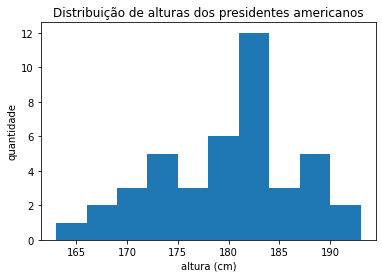

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(heights)
plt.title('Distribuição de alturas dos presidentes americanos')
plt.xlabel('altura (cm)')
plt.ylabel('quantidade')

As operações de comparação também servem como um papel essencial para o nosso dia-a-dia. Acurácia, por exemplo, é uma métrica baseada na comparação de dois arrays.

In [66]:
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [67]:
# Quais presidentes são maiores que 1.80 m?
heights > 180

array([ True, False,  True, False,  True, False,  True, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True])

In [68]:
# E quais são as alturas?
heights[heights>180]

array([189, 189, 183, 185, 183, 183, 193, 183, 183, 182, 183, 182, 188,
       183, 193, 182, 183, 185, 188, 188, 182, 185])

In [69]:
# Vamos converter pra metros
metros = heights/100
print(metros)

[1.89 1.7  1.89 1.63 1.83 1.71 1.85 1.68 1.73 1.83 1.73 1.73 1.75 1.78
 1.83 1.93 1.78 1.73 1.74 1.83 1.83 1.68 1.7  1.78 1.82 1.8  1.83 1.78
 1.82 1.88 1.75 1.79 1.83 1.93 1.82 1.83 1.77 1.85 1.88 1.88 1.82 1.85]


### Ordenação de arrays

In [70]:
print(np.sort(metros))

[1.63 1.68 1.68 1.7  1.7  1.71 1.73 1.73 1.73 1.73 1.74 1.75 1.75 1.77
 1.78 1.78 1.78 1.78 1.79 1.8  1.82 1.82 1.82 1.82 1.83 1.83 1.83 1.83
 1.83 1.83 1.83 1.83 1.85 1.85 1.85 1.88 1.88 1.88 1.89 1.89 1.93 1.93]


# Visualização com Matplotlib

Assim como usamos `np` como um "apelido" para o `import numpy`, geralmente o `matplotlib.pyplot` recebe `plt` como "apelido". Vamos importar o `pyplot`, que é uma das várias interfaces do matplotlib.

In [71]:
import matplotlib.pyplot as plt

Os notebooks IPython combinam diversos elementos, inclusive HTML, em um documento executável. Plotar um gráfico no IPython é um pouco diferente do que no Python comum. Temos duas opções para embutir gráficos direto no notebook:

- `%matplotlib notebook` irá criar plots interativos
- `%matplotlib inline` irá criar imagens estáticas

Geralmente, usaremos `%matplotlib inline`.

In [72]:
%matplotlib inline

A partir de agora, todos os gráficos serão embutidos como uma imagem PNG no documento.

### Interface de plotagem

O Matplotlib foi pensado originalmente como uma alternativa Python para os desenvolvedores MATLAB, e sua sintaxe reflete bastante isso.

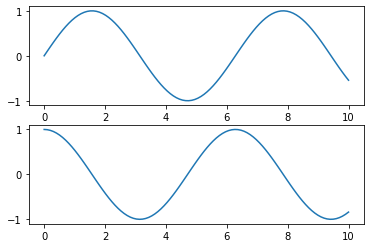

In [73]:
x = np.linspace(0, 10, 100)

plt.figure() # aqui, criamos uma figura

# vamos ter dois painéis no plot, o que é conhecido como subplots
plt.subplot(2, 1, 1) # 2 linhas, 1 coluna, trabalhando no painel 1
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2) # 2 linhas, 1 coluna, trabalhando no painel 2
plt.plot(x, np.cos(x))

### Gráficos em linha simples

No plt, uma figura pode ser pensada como um contâiner de todos os objetos que representam os eixos, gráficos, textos, anotações...

Logo, podemos criar figuras com vários objetos. Por exemplo:

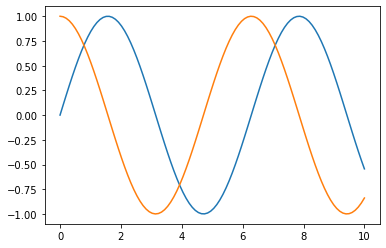

In [74]:
plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

Uma vantagem do plt é que podemos criar gráficos bonitos (ou feios... gosto não se discute!) para apresentações e trabalhos acadêmicos. Podemos, por exemplo, ajustar cor.

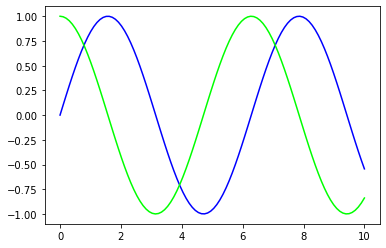

In [75]:
plt.figure()
plt.plot(x, np.sin(x), color='blue') # nome da cor
plt.plot(x, np.cos(x), color=(0, 1, 0)) # rgb

Ajustar o tipo da linha...

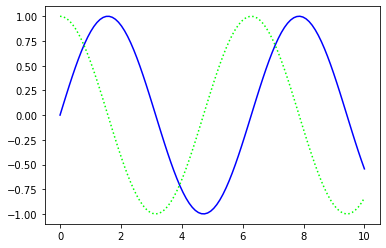

In [76]:
plt.figure()
plt.plot(x, np.sin(x), color='blue', linestyle='-')
plt.plot(x, np.cos(x), color=(0, 1, 0), linestyle=':')

Ou, mais fácil ainda...

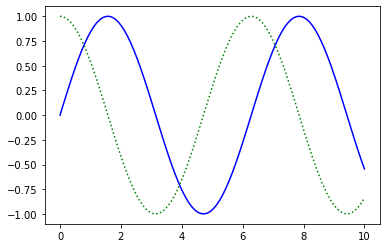

In [77]:
plt.figure()
plt.plot(x, np.sin(x), '-b')
plt.plot(x, np.cos(x), ':g')

Vamos continuar personalizando o nosso gráfico. Podemos pensar agora em como os limites do gráfico estão errados (notem o espaço). Vamos ajustar isso.

(-1.5, 1.5)

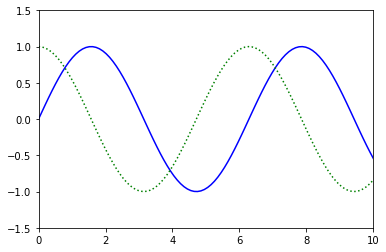

In [78]:
plt.figure()
plt.plot(x, np.sin(x), '-b')
plt.plot(x, np.cos(x), ':g')

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

Podemos adicionar títulos e nomes aos eixos, fazendo com que a imagem possa ser salva e já usada em artigos científicos sem precisar de anotação em softwares de edição de imagem.

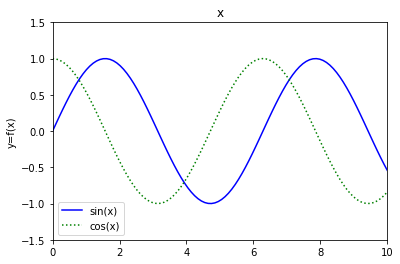

In [79]:
plt.figure()
plt.plot(x, np.sin(x), '-b', label='sin(x)')
plt.plot(x, np.cos(x), ':g', label='cos(x)')

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

plt.title('Seno e cosseno')
plt.title('x')
plt.ylabel('y=f(x)')
plt.legend()

Agora, vamos ganhar uns pontos com os revisores usando este gráfico sensacional no nosso artigo. Vamos salvá-lo em disco:

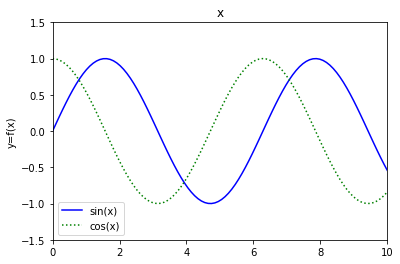

In [80]:
plt.figure()
plt.plot(x, np.sin(x), '-b', label='sin(x)')
plt.plot(x, np.cos(x), ':g', label='cos(x)')

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

plt.title('Seno e cosseno')
plt.title('x')
plt.ylabel('y=f(x)')
plt.legend()

plt.savefig('grafico.png')

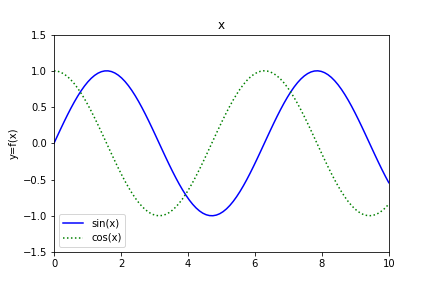

In [81]:
from IPython.display import Image
Image('grafico.png')

# Aprendizado raso (machine learning)

Em várias formas, machine learning é o meio principal por onde a ciência de dados, no geral, se manifesta para o mundo. O termo ML é usado às vezes como uma pílula mágica: se eu tenho uma imensa gama de dados, é só aplicar ML e tudo estará resolvido. Infelizmente, não é tão simples assim.

Aqui nós vamos entrar em alguns aspectos práticos de machine learning, primariamente com a biblioteca scikit-learn. Poderíamos usar bibliotecas de Deep Learning pra isso, mas será uma viagem muito mais suave usando scikit-learn.

## O que é ML?

Aprendizado de máquina, apesar de ser considerada uma área de Inteligência Artificial, difere um pouco por causa da forma como os problemas são abordados. Aqui, iremos construir modelos matemáticos que nos ajudarão a entender os dados, e esses modelos terão parâmetros que poderão ser ajustados para se adaptar aos dados observados. Por isso, dizemos que aprendemos com os dados.

Em uma grande generalização, existem duas categorias de aprendizado:

- Aprendizado supervisionado, que é quando o nosso modelo aprende uma relação com anotações dos dados, e, dado que o modelo foi determinado, podemos agora usar em dados desconhecidos. Temos duas tarefas nessa categoria: classificação e regressão.

- Aprendizado não-supervisionado, que é quando temos um conjunto de dados sem anotações e permitimos que os dados "falem por si mesmo". Aqui, existem tarefas como clustering (agrupamento) e redução de dimensionalidade.

Também existem os métodos semi-supervisionados, que são algo entre esses dois mundos.

Veremos alguns exemplos no futuro.

## Aprendizado supervisionado - regressão linear

Regressão linear é o "Hello, world!" do machine learning, e é um exemplo interessante para entender o funcionamento das ferramentas.

Aqui, o nosso objetivo é simples: queremos desenhar uma linha que acompanha a distribuição dos dados (fit). Vamos gerar alguns dados de exemplo:

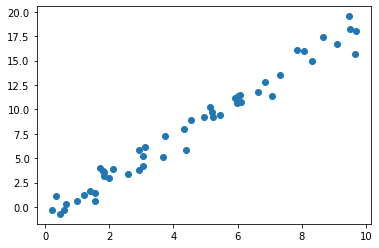

In [82]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

Agora, vamos seguir uma pequena receita de bolo.

### 1. Escolher um modelo

No Scikit-learn, todas as classes de modelo são representadas como uma classe do Python. Por exemplo, para um modelo simples de regressão linear, iremos importar a seguinte classe:

In [83]:
from sklearn.linear_model import LinearRegression
# Leia: do conjunto de modelos para tarefas lineares 
# do scikit-learn, importe a técnica de regressão linear.

Note que existem outros modelos gerais de regressão linear. Você pode ler mais sobre eles na documentação do [``sklearn.linear_model``](http://Scikit-Learn.org/stable/modules/linear_model.html).

### 2. Escolher seus hiperparâmetros

Uma classe de modelos não é uma instância de um modelo. Após definir qual abordagem vamos usar, precisamos ainda decidir algumas coisas. Esses são os hiperparâmetros, e iremos ver mais sobre eles no futuro.

Por enqaunto, vamos decidir apenas uma coisa: iremos usar o hiperparâmetro fit_intercept, que tem relação com a centralização dos dados.

In [84]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3. Organize seus dados

O scikit-learn espera os dados da seguinte forma:

- Os dados de entrada devem estar no formato `[número de amostras, número de características]`
- As anotações precisam estar na forma `[número de amostras]`.

Por exemplo, em um conjunto de dados com 50 amostras contendo duas variáveis (altura e largura), nosso conjunto de dados seria na forma de `[50, 2]`.

Precisamos então tratar um pouco nossos dados de entrada.

In [85]:
print(x.shape)
X = x[:, np.newaxis] # Crie um eixo novo
print(X.shape)

(50,)
(50, 1)


### 4. Dê fit nos seus dados

Agora vamos fazer a parte relacionada à aprendizagem. O comando fit() inicia as computações internas que buscarão os parâmetros do modelo.

In [86]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
print(model.coef_)
print(model.intercept_)

[1.9776566]
-0.9033107255311146


### 5. Faça a predição de anotações para dados desconhecidos

Após o treinamento do modelo, a nossa principal tarefa agora é avaliar o que ele diz sobre dados que não estavam no conjunto de treinamento. No scikit-learn, usamos o método `predict()` para isso. Vamos criar novos dados.

In [88]:
novo_x = np.linspace(-1, 11)
novo_X = novo_x[:, np.newaxis]

novo_y = model.predict(novo_X)

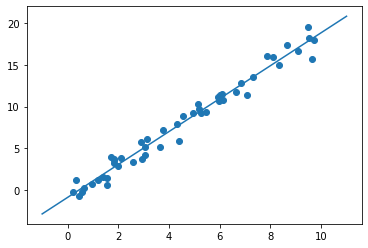

In [89]:
plt.scatter(x, y) # Os dados originais
plt.plot(novo_X, novo_y) # O "fit" do nosso modelo

## Aprendizado supervisionado - Dataset Iris

O Iris é um conjunto de dados bem comum para aprendizagem de máquina que consiste em anotações sobre flores Iris na natureza. É um ótimo candidato para um primeiro exemplo prático e real.

Usaremos uma técnica diferente agora, a Gaussian Naive Bayes, que assume que cada classe é "pescada" de uma distribuição Gaussiana. A GaussianNB é uma técnica de execução rápida e sem a necessidade de escolha de hiperparâmetros, o que torna esse modelo uma boa base de avaliação.

Deixaremos mais claro agora os conjuntos que iremos usar para separar os dados. O scikit-learn já tem um método que faz isso pra nós.

In [90]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [91]:
X_iris = iris.drop('species', axis=1)
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [92]:
y_iris = iris['species']
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [93]:
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [94]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                train_size=0.75,
                                                random_state=1)

In [95]:
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(112, 4) (38, 4) (112,) (38,)


In [96]:
from sklearn.naive_bayes import GaussianNB #1
model = GaussianNB() #2
model.fit(Xtrain, ytrain) #3
output = model.predict(Xtest) #4

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, output)

0.9736842105263158

## Aplicação: classificação de dígitos manuscritos

Vamos demonstrar esses princípios com um problema um pouco mais interessante, o de identificação de dígitos manuscritos. Em ambientes não controlados, o problema envolve também a detecção desses caracteres na imagem, mas aqui vamos focar apenas na parte de classificação dos dígitos já pré-formatados.

### Carregando e visualizando os dados

In [98]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

Lemos o shape desse vetor da seguinte forma: são `1797` amostras, cada uma contendo uma imagem de `8x8`. Vamos visualizar os dígitos.

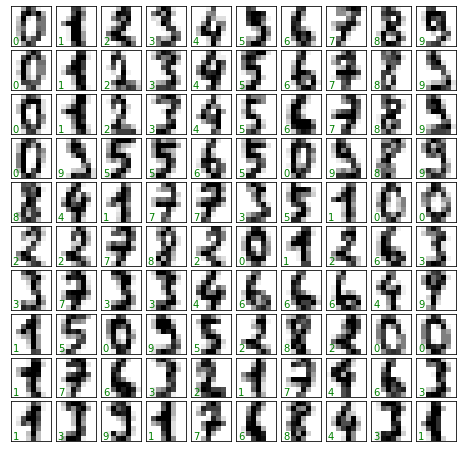

In [99]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),
          transform=ax.transAxes, color='green')

Vamos lembrar que o scikit-learn espera uma representação de entrada do tipo `[número de amostras, número de características]`. Por isso, precisamos tratar cada pixel na imagem como uma característica. Uma forma de fazer isso é através de um "flatten", que é formatar a entrada para `[1797, 8*8]`. Nesse caso, poemos usar o atributo `data`.

In [100]:
X = digits.data
y = digits.target
print('Shape dos dados de entrada: ', X.shape)
print('Shape das anotações: ', y.shape)

Shape dos dados de entrada:  (1797, 64)
Shape das anotações:  (1797,)


In [101]:
teste = digits.images
teste = teste.reshape((teste.shape[0], teste.shape[1]*teste.shape[2]))
teste.shape

(1797, 64)

### Classificação

In [102]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_predicted = model.predict(Xtest)

accuracy_score(ytest, y_predicted)

0.8333333333333334

Apesar de termos alcançado 83% de acurácia, essa métrica não nos explica onde nós erramos. Vamos plotar uma matriz de confusão para verificar isso.

Text(91.68, 0.5, 'ground-truth')

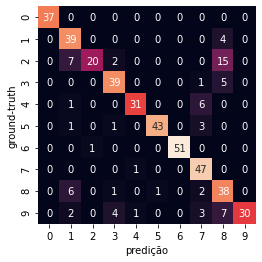

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, y_predicted)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predição')
plt.ylabel('ground-truth')

## Validação de modelos

A princípio, validação de modelos é algo bem simples: escolhemos um modelo e seus hiperparâmetros, e depois vemos sua acurácia em um conjunto de dados.

As próximas sessões vão mostrar algumas ideias sobre validação de modelos e onde elas falham geralmente.

### Forma errada

Vamos voltar ao dataset Iris e fazer novamnte o passo-a-passo.

Aqui, usaremos o classificador k-vizinhos (k-neighbors). Este é um modelo bem simples que praticamente se comporta da forma "a anotação de um ponto desconhecido é a mesma de uma anotação de um ponto de treinamento próximo no espaço".

In [105]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)
accuracy_score(y, y_model)

1.0

100% de acurácia? corre pra publicar!

Mas, será que essa é a forma correta de verificar a acurácia? Como você já deve ter imaginado, a resposta é não.

Pense um pouco sobre o que está errado, e depois rode a célula abaixo para confirmar seus pensamentos.

In [106]:
#@title Resposta da pergunta anterior (execute)
print('Na linha 11, usamos o conjunto de treino para fazer a avaliação.')

Na linha 11, usamos o conjunto de treino para fazer a avaliação.


### A forma correta

Então, o que podemos fazer? Uma melhor forma de avaliar a performance do modelo é criar um conjunto de "holdout", ou seja, um conjunto que irá ser segurado.

Essa divisão pode ser feita usando o método `train_test_split`, como visto antes.

In [107]:
from sklearn.model_selection import train_test_split
# dividimos o conjunto de dados em 50%
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit no modelo em um dos conjuntos
model.fit(X1, y1)

# avaliar o modelo no segundo conjunto
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

A desvantagem de usar um conjunto de "holdout" é que perdemos uma porção dos nossos dados. Em ML, isso pode ser bastante prejudicial, já que, no exemplo anterior, metade dos dados não contribuem ao treinamento do modelo.

Uma forma de resolver isso é usar cross-validation (validação cruzada), ou seja, fazer vários fits em subsets dos dados.

Vejamos um exemplo de *five-fold cross-validation* (validação cruzada em 5 conjuntos)

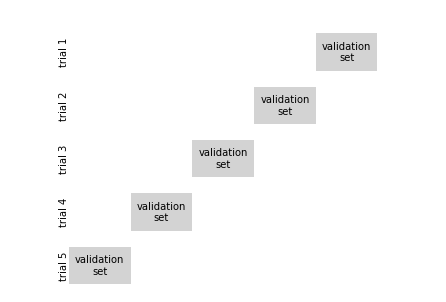

In [108]:
def draw_rects(N, ax, textprop={}):
    for i in range(N):
        ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white'))
        ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightgray'))
        ax.text(5. * (i + 0.5) / N, i + 0.35,
                "validation\nset", ha='center', va='center', **textprop)
        ax.text(0, i + 0.35, "trial {0}".format(N - i),
                ha='right', va='center', rotation=90, **textprop)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-0.2, N + 0.2)


#@title Validação cruzada em 5 folds
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(5, ax, textprop=dict(size=10))

In [109]:
from sklearn.model_selection import cross_val_score
import numpy as np
np.mean(cross_val_score(model, X, y, cv=5))

0.96

### Leia mais:
- [Scikit-learn](http://scikit-learn.org/)
- [Machine Learning @ Coursera](https://www.coursera.org/learn/machine-learning)
- [Pattern Recognition and Machine Learning](http://www.springer.com/us/book/9780387310732)
- Feature engineering [1](https://scikit-learn.org/stable/modules/feature_extraction.html) [2](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html) [3](https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8)